In [5]:
from utils import imageUtils
from utils import postProcessing
from utils import MultiDefectDetectionDataset
from utils import evaluation
from utils import visualization
import numpy as np
import os
from chainercv.links import FasterRCNNVGG16
from chainercv.visualizations import vis_bbox
from chainercv.utils import write_image
import chainer
import math
from chainercv import utils
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
#load Data
root = './data/3Types/Data3TypesYminXminYmaxXmax5'
dataset = MultiDefectDetectionDataset(data_dir=root, split='train')
dataset_test = MultiDefectDetectionDataset(data_dir=root, split='test')
bbox_label_names = ('111', 'dot','100')

In [3]:
# DataSet Statistics
print('total number of training images: ', len(dataset))
print('total number of test images: ', len(dataset_test))
print('type of defects: ', bbox_label_names)

total number of training images:  153
total number of test images:  12
type of defects:  ('111', 'dot', '100')


Best performance model list

0.81 : "snapshot_model_510000_lr1_20180924.npz"


In [21]:
# import Evaluator
from chainer.iterators import SerialIterator
from chainercv.extensions import DetectionVOCEvaluator
# Only use subset of dataset so that evaluation finishes quickly.
dataset = dataset_test
# set batch size = 1
it = SerialIterator(dataset, 1, repeat=False, shuffle=False)

# Build the detector
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=3, pretrained_model='./modelResults/snapshot_model_510000_20181001_DataSet6WithDA.npz', ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1024, max_size=1024,proposal_creator_params=proposal_params)

bbox_label_names = ('111', 'dot','100')

evaluator = DetectionVOCEvaluator(it, model,label_names=bbox_label_names)
# result is a dictionary of evaluation scores. Print it and check it.
result = evaluator()
print(result) 

{'main/map': 0.48544403660171032, 'main/ap/dot': 0.37369327619751574, 'main/ap/100': 0.50041962234299375, 'main/ap/111': 0.58221921126462139}


In [17]:
evaluator = DetectionVOCEvaluator(it,  model, use_07_metric= True,label_names=bbox_label_names)
# result is a dictionary of evaluation scores. Print it and check it.
result = evaluator()
print(result)

{'main/map': 0.40924984235822931, 'main/ap/dot': 0.30945707546990081, 'main/ap/100': 0.42136968423733129, 'main/ap/111': 0.49692276736745578}


# Using P and R to calculate the error

In [13]:
# Over all calculation of test data set
from utils.evaluation import evaluate_set_by_centroid_kind

# Build the detector
use_gpu = False
proposal_params = {'min_size': 8}
model = FasterRCNNVGG16(n_fg_class=3, pretrained_model='./modelResults/snapshot_model_510000_20181001_DataSet6WithDA.npz', ratios=[ 0.5, 1, 1.5, 2, 2.5, 3, 3.5,4],anchor_scales=[1, 4, 8, 16], min_size=1024, max_size=1024,proposal_creator_params=proposal_params)

bbox_label_names = ('111', 'dot','100')

%time recalls, precisions = evaluate_set_by_centroid_kind(model,bbox_label_names, dataset_test, threshold=0.05)
print("Average recall ", sum(recalls)/len(recalls))
print("Average precision ", sum(precisions)/len(precisions))

CPU times: user 5min 9s, sys: 1min 36s, total: 6min 46s
Wall time: 5min 56s
Average recall  0.8628215205552489
Average precision  0.7367844553813366


In [11]:
print(recalls)

[0.5625, 0.92, 0.8079470198675497, 0.9217391304347826, 0.9230769230769231, 0.9483870967741935, 0.8438661710037175, 0.8897058823529411, 0.8426966292134831, 1.0, 0.8939393939393939, 0.8]


In [12]:
print(precisions)

[0.6923076923076923, 0.6842105263157895, 0.5036231884057971, 0.7862068965517242, 0.8726114649681529, 0.8857142857142857, 0.9958677685950413, 0.48175182481751827, 0.7238095238095238, 0.6774193548387096, 0.7965116279069767, 0.7413793103448276]


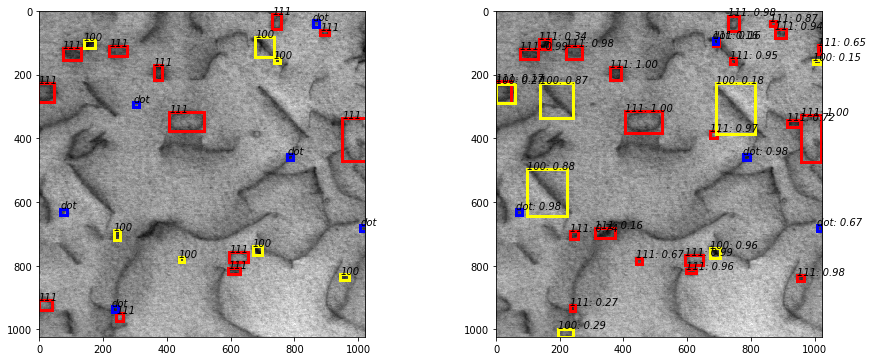

In [19]:
# Prediction of first image
img_1, bbs_1, lbs1 = dataset_test[1]
model.score_thresh = 0.1
bboxes, labels, scores = model.predict([img_1])
fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(1, 2, 2)
ax2 = fig.add_subplot(1, 2, 1)
# plot prediction
visualization.vis_bbox(img_1, bboxes[0], labels[0], scores[0], label_names=bbox_label_names, ax=ax1)
# plot ground truth
visualization.vis_bbox(img_1, bbs_1, lbs1, label_names=bbox_label_names,ax=ax2)
fig.savefig("test1.png")

In [17]:
print(lbs1)

[0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 1 1 1 1 1 1]


In [33]:
type(bbs_1)

numpy.ndarray

In [23]:
print(bboxes[0])

[[  314.75720215   406.2102356    383.5802002    522.48480225]
 [  328.17300415   956.58587646   474.11947632  1020.55999756]
 [  177.48622131   359.03494263   217.54820251   393.1413269 ]
 [  120.14122009    75.4445343    152.16508484   130.86251831]
 [  765.9395752    593.00512695   796.86315918   650.34692383]
 [   15.03281593   727.55523682    63.47014618   764.28448486]
 [  111.58168793   220.46289062   151.01535034   270.32342529]
 [  828.22540283   943.84625244   849.66314697   967.75262451]
 [  376.62051392   670.73748779   400.81143188   693.14373779]
 [  810.30371094   597.39306641   824.55969238   628.72839355]
 [  147.49511719   733.28149414   167.29736328   752.71508789]
 [   57.84401703   876.1126709     85.74745941   910.71984863]
 [   32.78352737   860.79321289    48.22343826   877.89306641]
 [  690.64642334   233.42007446   715.88726807   258.08111572]
 [  342.52767944   914.31518555   364.63320923   953.28015137]
 [  774.6550293    438.42807007   793.4699707    458.21

In [24]:
print(labels[0])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 2 2 2 2 2 2 2]


In [104]:
def bbox_iou(bbox_a, bbox_b):
    """Calculate the Intersection of Unions (IoUs) between bounding boxes.
    IoU is calculated as a ratio of area of the intersection
    and area of the union.
    This function accepts both :obj:`numpy.ndarray` as
    inputs. Please note that both :obj:`bbox_a` and :obj:`bbox_b` need to be same type.
    The output is same type as the type of the inputs.
    Args:
        bbox_a (array): An array whose shape is :math:`(N, 4)`.
            :math:`N` is the number of bounding boxes.
            The dtype should be :obj:`numpy.float32`.
        bbox_b (array): An array similar to :obj:`bbox_a`,
            whose shape is :math:`(K, 4)`.
            The dtype should be :obj:`numpy.float32`.
    Returns:
        array:
        An array whose shape is :math:`(N, K)`. \
        An element at index :math:`(n, k)` contains IoUs between \
        :math:`n` th bounding box in :obj:`bbox_a` and :math:`k` th bounding \
        box in :obj:`bbox_b`.
    """
    if bbox_a.shape[1] != 4 or bbox_b.shape[1] != 4:
        raise IndexError
 
    # top left
    tl = np.maximum(bbox_a[:, None, :2], bbox_b[:, :2])
    print(tl)
    # bottom right
    br = np.minimum(bbox_a[:, None, 2:], bbox_b[:, 2:])
    print(br)
    
    print(br-tl)
    print(tl < br)
    print((tl < br).all(axis=2))
    print(np.prod(br - tl, axis=2))

    area_i = np.prod(br - tl, axis=2) * ((tl - br) <= 0 ).all(axis=2)
    print(area_i)
    area_a = np.prod(bbox_a[:, 2:] - bbox_a[:, :2], axis=1)
    area_b = np.prod(bbox_b[:, 2:] - bbox_b[:, :2], axis=1)
    return area_i / (area_a[:, None] + area_b - area_i)

In [92]:
bbox_a = np.array([[1,2,2,1],
                   [1,4,3,3],
                   [6,6,8,4]], np.float32)
bbox_b = np.array([[1,4,3,3]], np.float32)

In [38]:
bbox_b[:, :2]

array([[ 1.,  4.],
       [ 5.,  2.]])

In [100]:
bbox_b 

array([[ 1.,  4.,  3.,  3.]], dtype=float32)

In [105]:
bbox_iou(bbox_b,bbox_b)

[[[ 1.  4.]]]
[[[ 3.  3.]]]
[[[ 2. -1.]]]
[[[ True False]]]
[[False]]
[[-2.]]
[[-0.]]


array([[ 0.]], dtype=float32)

In [58]:
np.prod(np.array([1,2])-np.array([3,4]))

4